In [68]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sn
import matplotlib.pyplot as plt

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [69]:
df_BTC = pd.read_csv('final_BTCUSDT.csv')

In [70]:
df_BTC.head()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,open_timestamp,close_timestamp,symbol,currency
0,"12/31/2021, 23:00:00","12/31/2021, 23:59:59",46303.98,46520.13,46132.04,46216.93,985.99762,4.571976e+07,29555,484.09229,2.244919e+07,0,1640991600000,1640995199999,BTC,USDT
1,"12/31/2021, 22:00:00","12/31/2021, 22:59:59",46333.87,46569.97,46232.36,46303.99,991.85142,4.600406e+07,36280,447.96605,2.077702e+07,0,1640988000000,1640991599999,BTC,USDT
2,"12/31/2021, 21:00:00","12/31/2021, 21:59:59",45886.66,46513.67,45766.85,46333.86,1734.69585,7.997065e+07,54579,972.44065,4.482430e+07,0,1640984400000,1640987999999,BTC,USDT
3,"12/31/2021, 20:00:00","12/31/2021, 20:59:59",45728.28,46211.07,45678.00,45879.24,1831.41202,8.422142e+07,51300,997.72369,4.588270e+07,0,1640980800000,1640984399999,BTC,USDT
4,"12/31/2021, 19:00:00","12/31/2021, 19:59:59",46686.42,46688.68,45678.96,45728.28,3851.30902,1.776171e+08,87472,1691.64542,7.803749e+07,0,1640977200000,1640980799999,BTC,USDT


In [71]:
df_BTC['datetime'] = df_BTC['close_time'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y, %H:%M:%S"))

In [72]:
df_BTC['year'] = df_BTC['datetime'].apply(lambda x: x.year)
df_BTC['month'] = df_BTC['datetime'].apply(lambda x: x.month)
df_BTC['day'] = df_BTC['datetime'].apply(lambda x: x.day)
df_BTC['day_of_week'] = df_BTC['datetime'].apply(lambda x: x.weekday())
df_BTC['hour'] = df_BTC['datetime'].apply(lambda x: x.hour)

In [73]:
df_BTC = df_BTC[df_BTC['hour'] == 0]

In [74]:
df_BTC = df_BTC.sort_values('datetime', ascending = True).reset_index()

In [75]:
# df_BTC['change_close'] = (df_BTC['close'] - df_BTC['close'].shift(1))

In [76]:
df_BTC.shape

(887, 23)

In [77]:
df_BTC = df_BTC.drop('ignore', axis =1)

In [78]:
df_BTC.tail()

,index,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,...,open_timestamp,close_timestamp,symbol,currency,datetime,year,month,day,day_of_week,hour
882,17626,"06/02/2023, 00:00:00","06/02/2023, 00:59:59",26817.93,26824.64,26505.00,26786.03,3258.76190,8.696547e+07,65278,...,1685664000000,1685667599999,BTC,USDT,2023-06-02 00:59:59,2023,6,2,4,0
883,17602,"06/03/2023, 00:00:00","06/03/2023, 00:59:59",27242.59,27242.60,27152.20,27165.09,678.25975,1.844608e+07,20535,...,1685750400000,1685753999999,BTC,USDT,2023-06-03 00:59:59,2023,6,3,5,0
884,17578,"06/04/2023, 00:00:00","06/04/2023, 00:59:59",27069.22,27069.23,27001.59,27005.13,492.52090,1.332120e+07,17551,...,1685836800000,1685840399999,BTC,USDT,2023-06-04 00:59:59,2023,6,4,6,0
885,17554,"06/05/2023, 00:00:00","06/05/2023, 00:59:59",27115.20,27129.33,26966.00,27024.76,1770.73298,4.790883e+07,47349,...,1685923200000,1685926799999,BTC,USDT,2023-06-05 00:59:59,2023,6,5,0,0
886,17530,"06/06/2023, 00:00:00","06/06/2023, 00:59:59",25728.20,25756.34,25675.26,25690.89,1829.55213,4.705400e+07,39710,...,1686009600000,1686013199999,BTC,USDT,2023-06-06 00:59:59,2023,6,6,1,0


In [79]:
corr_matrix = df_BTC.corr()

In [80]:
# sn.heatmap(corr_matrix, annot=True)
# plt.show()

<Figure size 640x480 with 0 Axes>

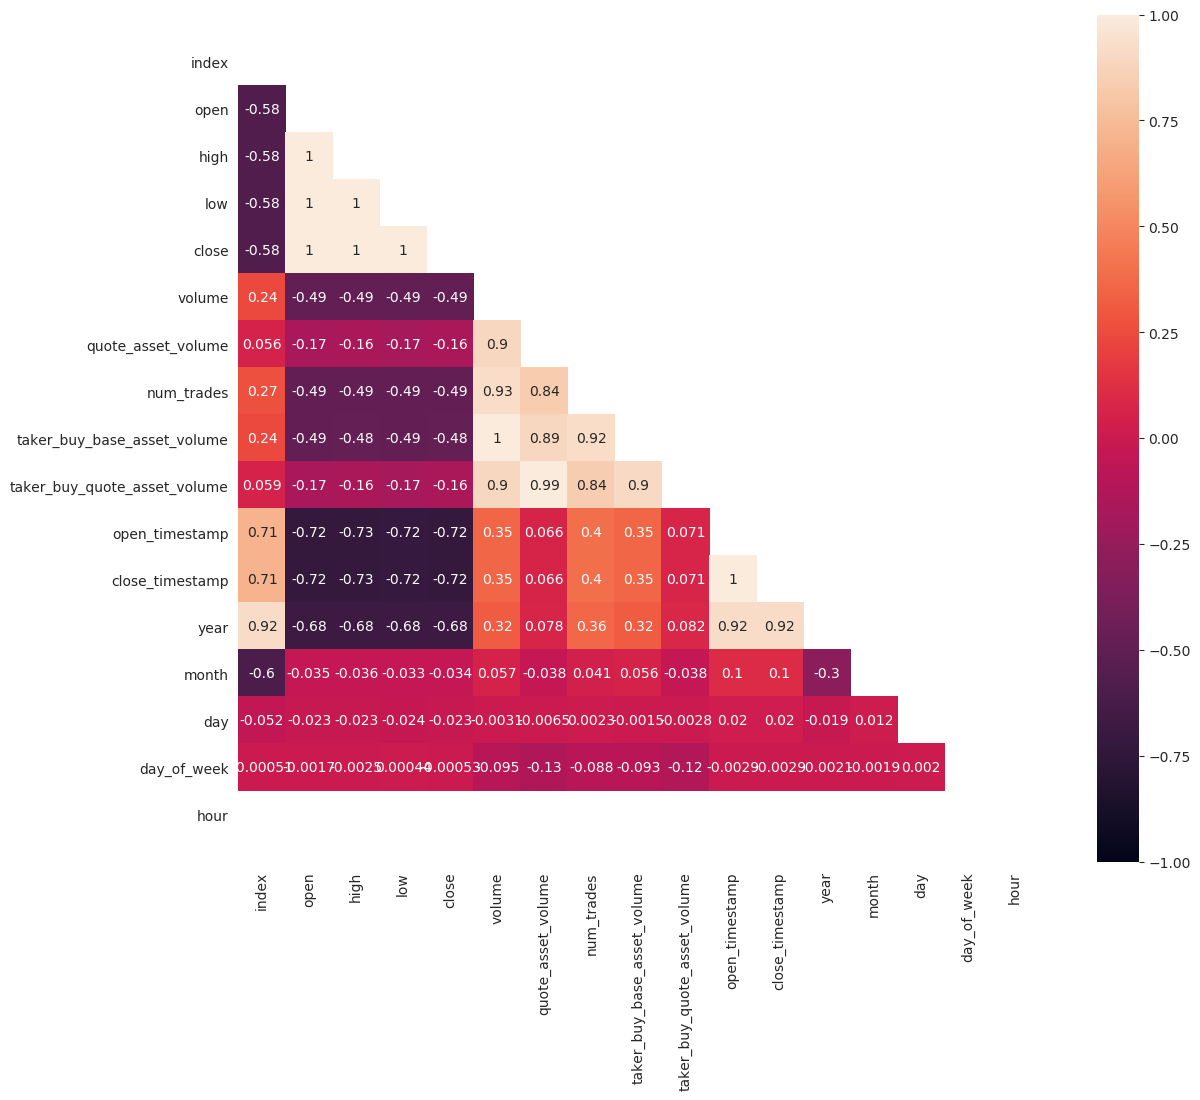

In [81]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 11))
    ax = sn.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin= -1.0, square=True, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plt.show()

### Load Twitter data

In [82]:
df_tweet = pd.read_csv('BTC_tweets_cleaned.csv')

In [83]:
df_tweet.head()

,year,month,day,day_of_week,text,timestamp,sentiment
0,2023,6,1,3,555 unique drawn mutant primapes soon on netw...,2023-06-01T00:00:00Z,NEUTRAL
1,2023,6,1,3,bitcoin mining your path to digital fortune jo...,2023-06-01T00:00:00Z,NEUTRAL
2,2023,6,1,3,2 takip imize toplamda 1000 tl hediye ediyoru...,2023-06-01T00:00:00Z,NaN
3,2023,6,1,3,tether planeja minerar bitcoin no uruguaifique...,2023-06-01T00:00:00Z,NEUTRAL
4,2023,6,1,3,face screaming in fear hyped wl giveaway high...,2023-06-01T00:00:00Z,POSITIVE


In [84]:
pd.to_datetime(df_tweet.timestamp[0][:-1]).hour

0

In [85]:
df_tweet_senti = pd.get_dummies(df_tweet.sentiment, prefix='Sentiment')
# df_tweet_senti.shape
df_tweet = df_tweet.join(df_tweet_senti)
df_tweet['hour'] = df_tweet['timestamp'].apply(lambda x: pd.to_datetime(x[:-1]).hour)
df_tweet.shape


(1576, 12)

In [86]:
df_tweet_agg = df_tweet.groupby(['year','month','day']).agg({'Sentiment_NEGATIVE':'sum','Sentiment_NEUTRAL':'sum',
                                                            'Sentiment_POSITIVE':'sum'}).reset_index()

df_tweet_agg.head()

,year,month,day,Sentiment_NEGATIVE,Sentiment_NEUTRAL,Sentiment_POSITIVE
0,2023,6,1,8,139,11
1,2023,6,2,4,144,11
2,2023,6,3,21,139,22
3,2023,6,4,25,156,27
4,2023,6,5,8,180,27


In [87]:
df_tweet_agg.shape

(7, 6)

In [88]:
df_joined = pd.merge(df_BTC, df_tweet_agg, how='inner', on=['year','month','day'])

df_joined.shape

(6, 25)

In [89]:
df_joined.head(2)

,index,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,...,currency,datetime,year,month,day,day_of_week,hour,Sentiment_NEGATIVE,Sentiment_NEUTRAL,Sentiment_POSITIVE
0,17650,"06/01/2023, 00:00:00","06/01/2023, 00:59:59",27210.36,27350.00,27023.35,27065.77,2772.82443,7.541711e+07,57885,...,USDT,2023-06-01 00:59:59,2023,6,1,3,0,8,139,11
1,17626,"06/02/2023, 00:00:00","06/02/2023, 00:59:59",26817.93,26824.64,26505.00,26786.03,3258.76190,8.696547e+07,65278,...,USDT,2023-06-02 00:59:59,2023,6,2,4,0,4,144,11


In [90]:
#filter for the days twitter data is avialable
# df_filter = df_joined[df_joined['datetime'] >= datetime.datetime(2023, 5, 20)]

In [91]:
# df_filter.dtypes

In [92]:
#Aggregating the dataframe by day to find out any correlation between the tweets and the prices 

df_hourly = df_joined.groupby(['day','month','year','day_of_week','hour']).agg({'open_time':'min',
                                                                         'close_time':'max',
                                                                         'open':'first',
                                                                         'high':'max',
                                                                         'low':'min',
                                                                         'close':'last',
                                                                         'volume':'sum',
                                                                         'num_trades':'sum',
                                                                         'open_timestamp':'min',
                                                                         'close_timestamp':'max',
                                                                         'datetime':'max',
                                                                         'Sentiment_NEGATIVE':'mean',
                                                                         'Sentiment_NEUTRAL':'mean',
                                                                         'Sentiment_POSITIVE':'mean'}).reset_index()


df_hourly['VolperTrade'] = df_hourly['volume']/df_hourly['num_trades']
df_hourly['log_close'] = np.log(df_hourly['close'])
df_hourly.head()


,day,month,year,day_of_week,hour,open_time,close_time,open,high,low,...,volume,num_trades,open_timestamp,close_timestamp,datetime,Sentiment_NEGATIVE,Sentiment_NEUTRAL,Sentiment_POSITIVE,VolperTrade,log_close
0,1,6,2023,3,0,"06/01/2023, 00:00:00","06/01/2023, 00:59:59",27210.36,27350.00,27023.35,...,2772.82443,57885,1685577600000,1685581199999,2023-06-01 00:59:59,8.0,139.0,11.0,0.047902,10.206025
1,2,6,2023,4,0,"06/02/2023, 00:00:00","06/02/2023, 00:59:59",26817.93,26824.64,26505.00,...,3258.76190,65278,1685664000000,1685667599999,2023-06-02 00:59:59,4.0,144.0,11.0,0.049921,10.195636
2,3,6,2023,5,0,"06/03/2023, 00:00:00","06/03/2023, 00:59:59",27242.59,27242.60,27152.20,...,678.25975,20535,1685750400000,1685753999999,2023-06-03 00:59:59,21.0,139.0,22.0,0.033029,10.209688
3,4,6,2023,6,0,"06/04/2023, 00:00:00","06/04/2023, 00:59:59",27069.22,27069.23,27001.59,...,492.52090,17551,1685836800000,1685840399999,2023-06-04 00:59:59,25.0,156.0,27.0,0.028062,10.203782
4,5,6,2023,0,0,"06/05/2023, 00:00:00","06/05/2023, 00:59:59",27115.20,27129.33,26966.00,...,1770.73298,47349,1685923200000,1685926799999,2023-06-05 00:59:59,8.0,180.0,27.0,0.037397,10.204509


In [93]:
df_hourly.columns

Index(['day', 'month', 'year', 'day_of_week', 'hour', 'open_time',
       'close_time', 'open', 'high', 'low', 'close', 'volume', 'num_trades',
       'open_timestamp', 'close_timestamp', 'datetime', 'Sentiment_NEGATIVE',
       'Sentiment_NEUTRAL', 'Sentiment_POSITIVE', 'VolperTrade', 'log_close'],
      dtype='object')

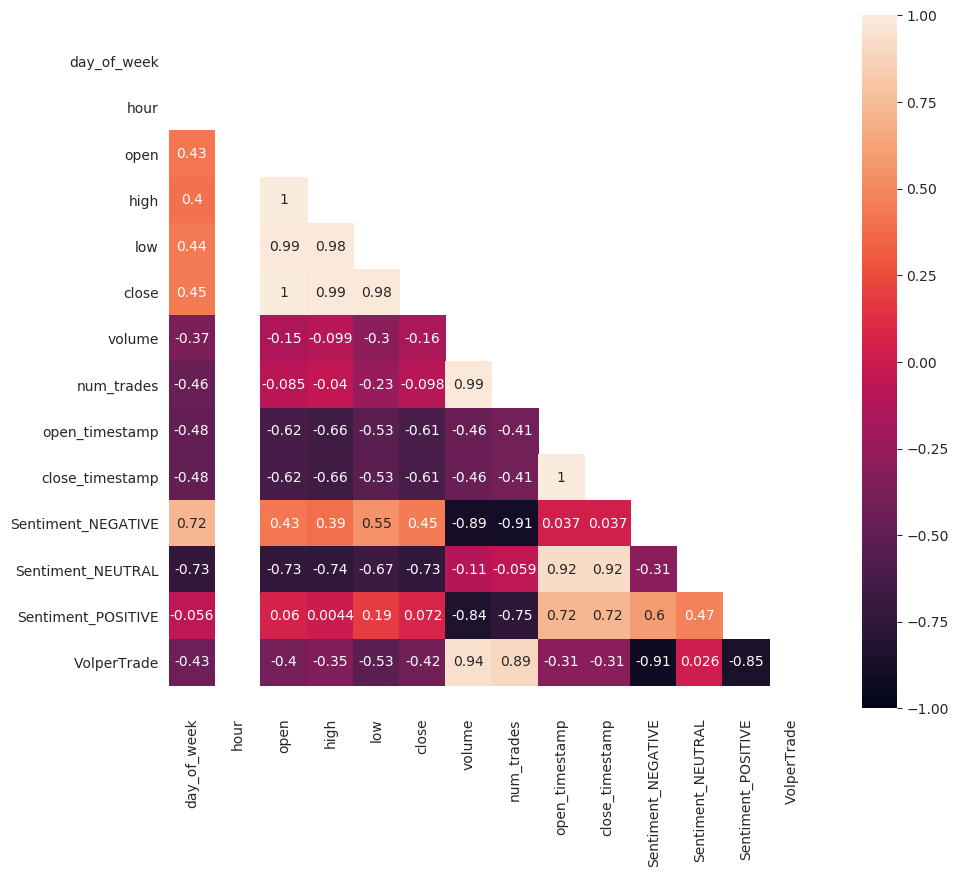

In [94]:
corr = df_hourly[['day_of_week', 'hour', 'open_time', 'close_time',
               'open', 'high', 'low', 'close', 'volume', 'num_trades',
               'open_timestamp', 'close_timestamp', 'Sentiment_NEGATIVE',
               'Sentiment_NEUTRAL', 'Sentiment_POSITIVE', 'VolperTrade']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 9))
    ax = sn.heatmap(corr, mask=mask, vmax=1.0, vmin= -1.0, square=True, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plt.show()

In [95]:
df_hourly.head()

,day,month,year,day_of_week,hour,open_time,close_time,open,high,low,...,volume,num_trades,open_timestamp,close_timestamp,datetime,Sentiment_NEGATIVE,Sentiment_NEUTRAL,Sentiment_POSITIVE,VolperTrade,log_close
0,1,6,2023,3,0,"06/01/2023, 00:00:00","06/01/2023, 00:59:59",27210.36,27350.00,27023.35,...,2772.82443,57885,1685577600000,1685581199999,2023-06-01 00:59:59,8.0,139.0,11.0,0.047902,10.206025
1,2,6,2023,4,0,"06/02/2023, 00:00:00","06/02/2023, 00:59:59",26817.93,26824.64,26505.00,...,3258.76190,65278,1685664000000,1685667599999,2023-06-02 00:59:59,4.0,144.0,11.0,0.049921,10.195636
2,3,6,2023,5,0,"06/03/2023, 00:00:00","06/03/2023, 00:59:59",27242.59,27242.60,27152.20,...,678.25975,20535,1685750400000,1685753999999,2023-06-03 00:59:59,21.0,139.0,22.0,0.033029,10.209688
3,4,6,2023,6,0,"06/04/2023, 00:00:00","06/04/2023, 00:59:59",27069.22,27069.23,27001.59,...,492.52090,17551,1685836800000,1685840399999,2023-06-04 00:59:59,25.0,156.0,27.0,0.028062,10.203782
4,5,6,2023,0,0,"06/05/2023, 00:00:00","06/05/2023, 00:59:59",27115.20,27129.33,26966.00,...,1770.73298,47349,1685923200000,1685926799999,2023-06-05 00:59:59,8.0,180.0,27.0,0.037397,10.204509


In [96]:
### Plot

In [97]:
# names = cycle(['Change in Close price', 'Positive Sentiment', 'Neutral Sentiment', 'Negative Sentiment'])

# fig = px.line(df_hourly, x=df_hourly['datetime'], y=[df_hourly['change_close'], df_hourly['Sentiment_POSITIVE'], df_hourly['Sentiment_NEUTRAL'], df_hourly['Sentiment_NEGATIVE']],)
# fig.update_layout(title_text='BTC Price vs Tweet Sentiment',
#                   plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
# fig.update_layout(
#     yaxis=dict(
#         title='Close Price',
#     )
# )


# fig.for_each_trace(lambda t:  t.update(name = next(names)))

# fig.update_xaxes(showgrid=False)
# fig.update_yaxes(showgrid=False)

<Figure size 640x480 with 0 Axes>

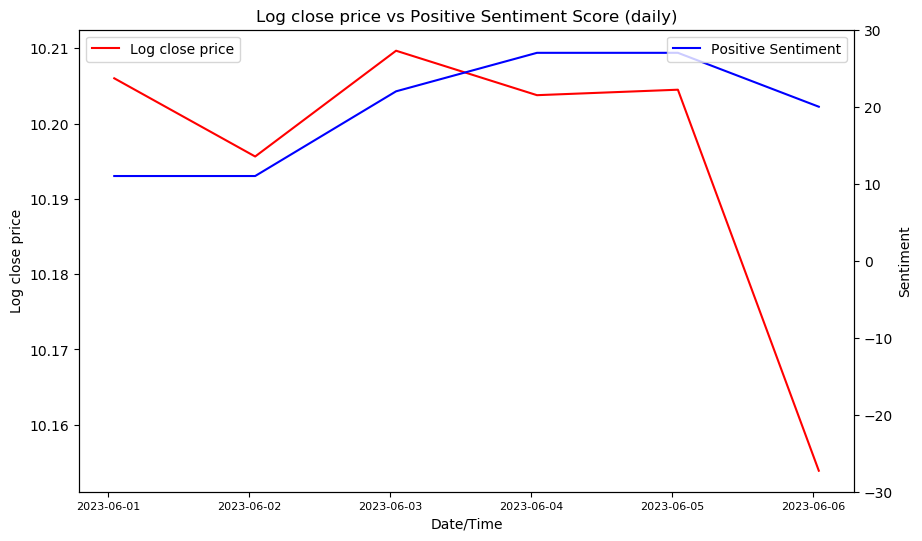

In [100]:
t = df_hourly ['datetime']
data1 = df_hourly['log_close']
# data1 = df_hourly['close']
data2 = df_hourly['Sentiment_POSITIVE']
data3 = df_hourly['Sentiment_NEUTRAL']
data4 = df_hourly['Sentiment_NEGATIVE']

fig, ax1 = plt.subplots(figsize=(10, 6))

plt.title('Log close price vs Positive Sentiment Score (daily)')

color = 'tab:red'
ax1.set_xlabel('Date/Time')
ax1.set_ylabel('Log close price', color='black')
ax1.plot(t, data1, color='red')
ax1.tick_params(axis='y', labelcolor='black')
# ax1.set_ylim([-2000, 2000])


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
ax2.set_ylabel('Sentiment', color='black')  # we already handled the x-label with ax1
ax2.plot(t, data2, color='blue', label='Positive Sentiment')
# ax2.plot(t, data3, color='green', label='Neutral Sentiment')
# ax2.plot(t, data4, color='orange', label='Negative Sentiment')
ax2.set_ylim([-30, 30])
# ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(['Log close price'], loc='upper left')
# ax2.legend(['Positive Sentiment', 'Neutral Sentiment', 'Negative Sentiment'], loc='upper right')
ax2.legend(['Positive Sentiment'], loc='upper right')
# ax2.legend(['Positive Sentiment', 'Negative Sentiment'], loc='upper right')
# ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))



ax1.tick_params(axis='x', labelsize=8)
ax2.tick_params(axis='x', labelsize=8)

plt.savefig('daily_log_positive.png', dpi=300, bbox_inches='tight')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [67]:
plt.clf()